# URL Analysis

This notebook is going to do exploratory analysis on the URLs which have been used as a reference in some of the answers from the MunicipalQA dataset.

The following analysis has been performed:

1. Most frequent URL domains
2. Most frequent main paths of the corresponding domain
3. Topics in the referenced URLs

In [1]:
### imports ###
import pandas as pd
from yarl import URL
import os
from collections import Counter

In [2]:
questions = pd.read_csv(open('/Users/natalipeeva/Desktop/Clean work/questions.csv', 'r'))
urls = sum(map(lambda x: x.split('\n'), questions[questions['URLs'].notnull()]['URLs']), [])
urls = list(map(lambda x: x if x.startswith('http') else f'https://{x}', urls))
len(urls)

781

In [3]:
questions['Year'] = pd.to_numeric(questions['Year'], errors='coerce')

In [4]:
questions['Year'].dropna().min()

2013.0

In [5]:
questions['Year'].dropna().max()

2022.0

In [6]:
len(questions)

19134

### make URLs from URL type - yarl

In [7]:
sample = pd.DataFrame()
sample['url'] = urls
sample['url'] = sample['url'].apply(lambda url: URL(url))
sample['path'] =sample.url.apply(lambda url: url.path)
sample['host'] =sample.url.apply(lambda url: url.host)

In [8]:
print('The most common domains are:')
print()
print(sample['host'].value_counts().head(20))

The most common domains are:

host
www.amsterdam.nl                       125
www.rijksoverheid.nl                    60
amsterdam.raadsinformatie.nl            48
www.parool.nl                           22
www.rivm.nl                             18
www.at5.nl                              15
www.ggd.amsterdam.nl                    13
maps.amsterdam.nl                       10
www.tweedekamer.nl                       8
www.infomil.nl                           7
www.nrc.nl                               7
data.amsterdam.nl                        7
www.telegraaf.nl                         7
twitter.com                              7
zoeken.amsterdam.raadsinformatie.nl      7
www.cbs.nl                               6
zoek.officielebekendmakingen.nl          6
assets.amsterdam.nl                      6
www.rvo.nl                               6
www.werk.nl                              6
Name: count, dtype: int64


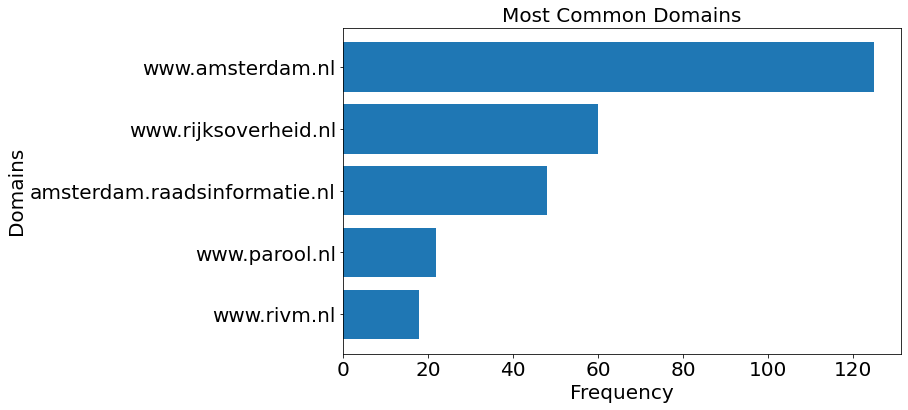

In [27]:
import matplotlib.pyplot as plt

# Get the top 20 most common domains and sort them
top_domains = sample['host'].value_counts().head(5).sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(top_domains.index, top_domains.values)  # Create the horizontal bar plot
plt.xlabel('Frequency', fontsize=20)  # Set the x-axis label with fontsize
plt.ylabel('Domains', fontsize=20)  # Set the y-axis label with fontsize
plt.title('Most Common Domains', fontsize=20)  # Set the title with fontsize
plt.xticks(fontsize=20)  # Set the font size of the x-axis ticks
plt.yticks(fontsize=20)  # Set the font size of the y-axis ticks

# Save the plot in high quality
plt.savefig('bar_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


### Check URL (file) extensions

In [5]:
pdf_count = 0
non_html_count = 0

extensions = []

for url in urls:
    # Extract the file extension from the URL
    file_ext = os.path.splitext(url)[1]
    extensions.append(file_ext)

In [6]:
Counter(extensions).most_common(5)

[('', 525), ('.', 108), ('.nl', 49), ('.pdf', 41), ('.html', 15)]

There are some .pdf which should be accounted for during collection.

### Inspect amsterdam.nl paths

In [7]:
def extract_string(url, domain):
    """
    Extracts the string between 'amsterdam.nl/' and the next '/' in a URL.
    """
    
    start_index = url.find(domain + '/') + len(domain + '/')
    end_index = url.find('/', start_index)
    if end_index == -1:
        end_index = len(url)
    return url[start_index:end_index]

In [8]:
######### Amsterdam.nl ###########
paths = []
for url in urls:
    if 'www.amsterdam.nl' in url:
        paths.append(extract_string(url, 'amsterdam.nl'))

Counter(paths).most_common(5)

[('wonen-leefomgeving', 12),
 ('bestuur-organisatie', 10),
 ('amsterdam.nl', 10),
 ('veelgevraagd', 8),
 ('publish', 7)]

In [9]:
######### Rijksoverheid ###########
paths = []
for url in urls:
    if 'www.rijksoverheid.nl' in url:
        paths.append(extract_string(url, 'rijksoverheid.nl'))

Counter(paths).most_common()

[('documenten', 41),
 ('onderwerpen', 10),
 ('actueel', 3),
 ('regering', 3),
 ('ministeries', 2),
 ('doe-mee', 1),
 ('le.com', 1)]

In [10]:
######### amsterdam.raadsinformatie.nl ###########
paths = []
for url in urls:
    if 'amsterdam.raadsinformatie.nl' in url:
        paths.append(extract_string(url, 'amsterdam.raadsinformatie.nl'))

Counter(paths).most_common()

[('document', 46), ('cgi-bin', 7), ('vergadering', 1), ('modules', 1)]

In [11]:
######### www.parool.nl  ###########
paths = []
for url in urls:
    if 'www.parool.nl' in url:
        paths.append(extract_string(url, 'parool.nl'))

Counter(paths).most_common()

[('amsterdam', 13),
 ('nieuws', 2),
 ('es-bb2825c9).', 1),
 ('nederland', 1),
 ('columns-opinie', 1),
 ('parool', 1),
 ('cs-b49e70edAfdeli', 1),
 ('opinie', 1),
 ('sport', 1)]

In [12]:
######### www.rivm.nl  ###########
paths = []
for url in urls:
    if 'www.rivm.nl' in url:
        paths.append(extract_string(url, 'rivm.nl'))

Counter(paths).most_common()

[('publicaties', 5),
 ('windenergie', 3),
 ('coronavirus-covid-19', 2),
 ('documenten', 2),
 ('bibliotheek', 2),
 ('nieuws', 1),
 ('hitte', 1),
 ('sites', 1),
 ('monkeypox-apenpokken', 1),
 ('', 1)]

In [13]:
######### www.ggd.amsterdam.nl  ###########
paths = []
for url in urls:
    if 'www.ggd.amsterdam.nl' in url:
        paths.append(extract_string(url, 'ggd.amsterdam.nl'))

Counter(paths).most_common()

[('gezond-wonen', 5),
 ('coronavirus', 2),
 ('publish', 1),
 ('beleid-onderzoek', 1),
 ('gezonde-en-kansrijke-start-amsterdam', 1),
 ('nieuwsoverzicht', 1),
 ('ggd', 1),
 ('infectieziekten', 1)]

In [14]:
######### www.tweedekamer.nl  ###########
paths = []
for url in urls:
    if 'www.tweedekamer.nl' in url:
        paths.append(extract_string(url, 'tweedekamer.nl'))

Counter(paths).most_common()

[('kamerstukken', 6), ('debat_en_vergadering', 2)]

In [15]:
######### www.infomil.nl  ###########
paths = []
for url in urls:
    if 'www.infomil.nl' in url:
        paths.append(extract_string(url, 'infomil.nl'))

Counter(paths).most_common()

[('onderwerpen', 7)]

In [16]:
######### www.infomil.nl  ###########
paths = []
for url in urls:
    if 'data.amsterdam.nl' in url:
        paths.append(extract_string(url, 'data.amsterdam.nl'))

Counter(paths).most_common()

[('artikelen', 4), ('publicaties', 3)]

In order to be sure of the factual validity of our corpus we are going to collect supporting documents only from 

# Conclusions

1. The most frequently used domains as a reference are: amsterdam.nl, rijksoverheid.nl, rivm.nl, etc. 
2. The most frequent sub-domains were analyzed and would be taken into account during collection. 



**Additional findings after manual exploration**:

1. Some URL paths are different at their current version than the version that has been used at the time of referencing 
2. Some URLs appear to be directing to a non-existent page
3. A common error that results in a URL being broken is a wrong ending, which is either a "." or a ")."

# Actions to take
1. Build a collection of supporting documents based on the most common domains and URL paths (url, html_content)
2. Update the URLs of the references with their most current versions 
3. Clean the URLs if needed (e.g. if they end with a '.')
4. Collect the HTML content of the refrence URLs as well